In [6]:
%matplotlib inline

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv("train.csv")

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
y = df.pop("Survived")

In [12]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [15]:
df.groupby(['Pclass', 'Sex']).Age.mean()
df["Age"].fillna(df.groupby(["Pclass", "Sex"])["Age"].transform("mean"), inplace=True)

In [17]:
print (df.describe())
df.Age.isnull()

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.318643    0.523008    0.381594   32.204208
std     257.353842    0.836071   13.281103    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   21.750000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   26.507589    0.000000    0.000000   14.454200
75%     668.500000    3.000000   36.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Age, dtype: bool

In [18]:
num_var = list(df.dtypes[df.dtypes != "object"].index)
df[num_var].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [20]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(df[num_var], y)

print ("c-stat: ", roc_auc_score(y, model.oob_prediction_))

c-stat:  0.765432098765


In [21]:

def describe_categorical(df):
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))

In [22]:
describe_categorical(df)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",male,1601,G6,S
freq,1,577,7,4,644


In [23]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [24]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

df["Cabin"] = df.Cabin.apply(clean_cabin)

In [25]:
df["Cabin"]

0      None
1         C
2      None
3         C
4      None
5      None
6         E
7      None
8      None
9      None
10        G
11        C
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21        D
22     None
23        A
24     None
25     None
26     None
27        C
28     None
29     None
       ... 
861    None
862       D
863    None
864    None
865    None
866    None
867       A
868    None
869    None
870    None
871       D
872       B
873    None
874    None
875    None
876    None
877    None
878    None
879       C
880    None
881    None
882    None
883    None
884    None
885    None
886    None
887       B
888    None
889       C
890    None
Name: Cabin, dtype: object

In [26]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    df[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(df[variable], prefix=variable)
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [27]:
df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5,3,26.507589,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [28]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, y)
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.868389096603


In [30]:
model.feature_importances_

array([ 0.09028235,  0.23935571,  0.04564788,  0.0203708 ,  0.21645936,
        0.14342344,  0.15882244,  0.00264146,  0.00350437,  0.006332  ,
        0.00502939,  0.00826215,  0.00091618,  0.00077479,  0.02624929,
        0.00025671,  0.01040664,  0.        ,  0.00656203,  0.01470301])

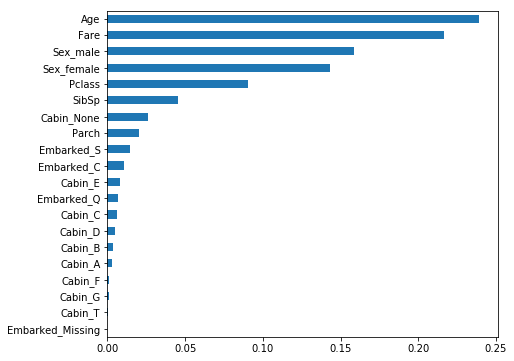

In [31]:
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

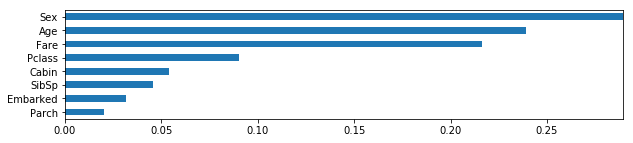

In [32]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        for col_name in summarized_columns: 
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )  
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict)
    results.sort_values(inplace=True)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, df.columns, summarized_columns=categorical_variables)

In [33]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(df, y)

1 loop, best of 3: 1.84 s per loop


In [36]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, y)

1 loop, best of 3: 1.37 s per loop


30 trees
C-stat:  0.85996602009

50 trees
C-stat:  0.863989816679

100 trees
C-stat:  0.868389096603

200 trees
C-stat:  0.868876426038

500 trees
C-stat:  0.870128037154

1000 trees
C-stat:  0.870165319187

2000 trees
C-stat:  0.870431619425



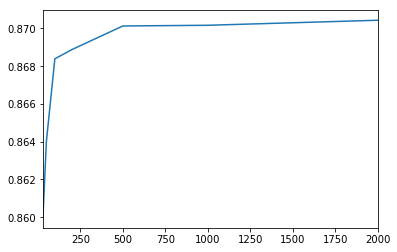

In [37]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(df, y)
    print (trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.870165319187

None option
C-stat:  0.870165319187

sqrt option
C-stat:  0.87049286848

log2 option
C-stat:  0.87049286848

0.9 option
C-stat:  0.869717934788

0.2 option
C-stat:  0.87049286848



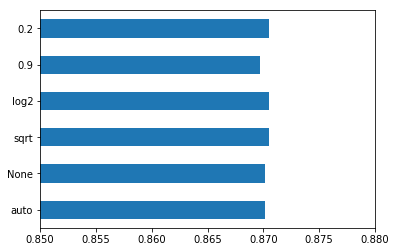

In [38]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(df, y)
    print (max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.870165319187

2 min samples
C-stat:  0.873938793553

3 min samples
C-stat:  0.875619148052

4 min samples
C-stat:  0.876985268271

5 min samples
C-stat:  0.8765698399

6 min samples
C-stat:  0.875121166608

7 min samples
C-stat:  0.874370199938

8 min samples
C-stat:  0.873219782912

9 min samples
C-stat:  0.87134502924

10 min samples
C-stat:  0.869054847197



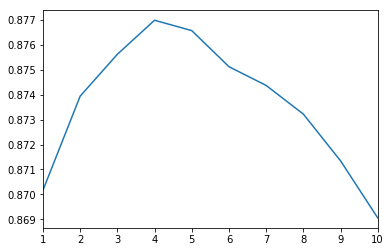

In [39]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print (min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();

In [40]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(df, y)
roc = roc_auc_score(y, model.oob_prediction_)
print ("C-stat: ", roc)

C-stat:  0.8765698399
